In [44]:
import os
import PIL
import shutil
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 1s 0us/step



Images in folder: daisy


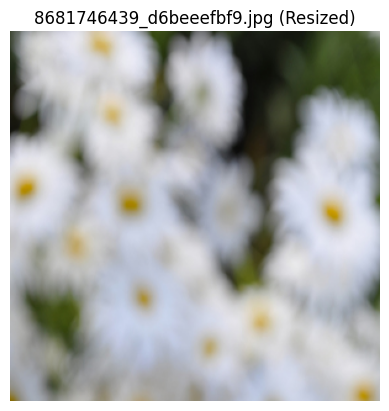

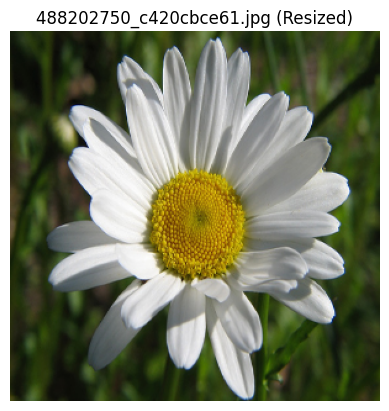


Images in folder: tulips


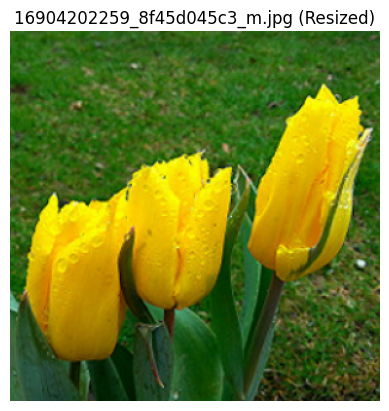

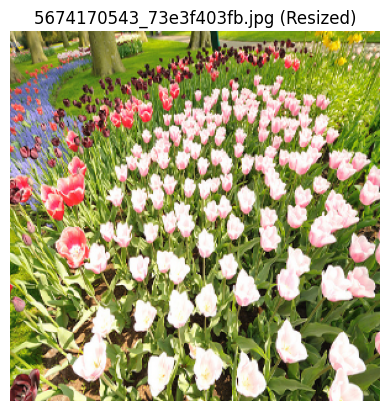


Images in folder: dandelion


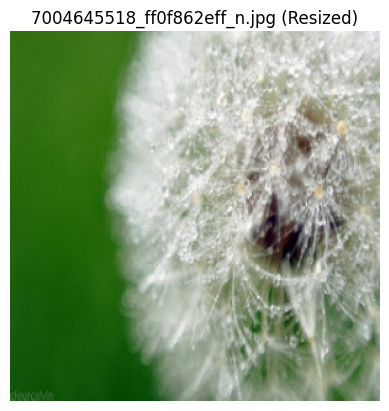

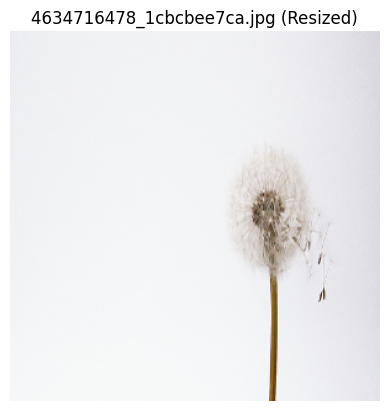


Images in folder: roses


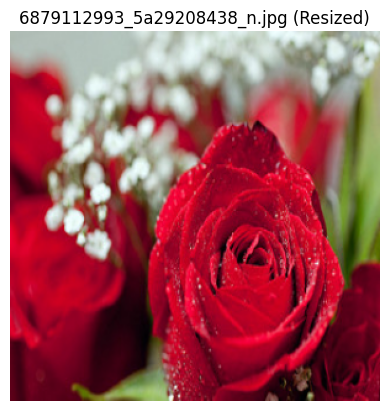

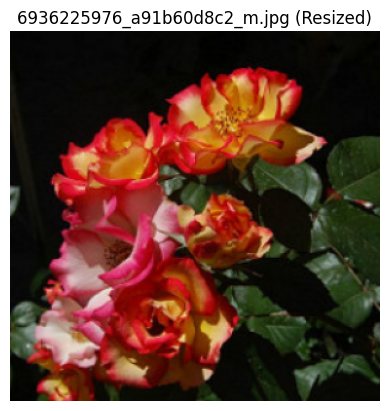


Images in folder: sunflowers


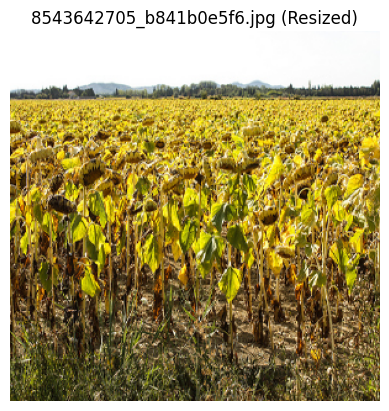

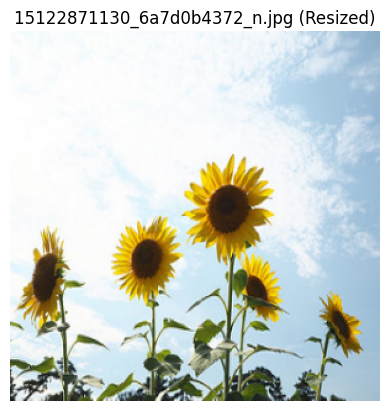

In [48]:
# Get a list of subdirectories (each subdirectory represents a category)
subdirectories = [x for x in data_dir.iterdir() if x.is_dir()]

# Define the number of images to display from each folder
num_images_to_display = 2
for directory in subdirectories:
  print()
  print(f"Images in folder: {directory.name}")
  image_files = list(directory.glob('*'))
  for img_path in image_files[:num_images_to_display]:
      img = cv2.imread(str(img_path))
      img_resized = cv2.resize(img, (300,300))

      # Display the resized image
      plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

      plt.title(f"{img_path.name} (Resized)")
      plt.axis('off')
      plt.show()

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))

print("Total no. of images: ", image_count)


Total no. of images:  3670


In [5]:
batch_size = 32

img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [8]:
class_names = train_ds.class_names

print("Class Names :", class_names)


Class Names : ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [9]:
train_ds = train_ds.cache().shuffle(1000)

val_ds = val_ds.cache()


In [10]:
num_classes = len(class_names) # 5


In [11]:
from tensorflow.keras import regularizers

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

  layers.Dense(num_classes)
   ])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
 )


In [13]:
# get inforamtion about layers present in model , shape of output and number of parameters in each layer
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 64800)             0

In [14]:
print("Model Training....")

Model Training....


In [15]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Stop training if validation loss doesn't improve after 5 epochs
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[early_stopping])


Epoch 1/50
92/92 [==============================] - 19s 45ms/step - loss: 2.2384 - accuracy: 0.3852 - val_loss: 1.5125 - val_accuracy: 0.5354
Epoch 2/50
92/92 [==============================] - 2s 19ms/step - loss: 1.3764 - accuracy: 0.5416 - val_loss: 1.2996 - val_accuracy: 0.5749
Epoch 3/50
92/92 [==============================] - 2s 19ms/step - loss: 1.3000 - accuracy: 0.5763 - val_loss: 1.2362 - val_accuracy: 0.5926
Epoch 4/50
92/92 [==============================] - 2s 19ms/step - loss: 1.2753 - accuracy: 0.5916 - val_loss: 1.2611 - val_accuracy: 0.5886
Epoch 5/50
92/92 [==============================] - 2s 19ms/step - loss: 1.2564 - accuracy: 0.6039 - val_loss: 1.2363 - val_accuracy: 0.6335
Epoch 6/50
92/92 [==============================] - 2s 20ms/step - loss: 1.2497 - accuracy: 0.6209 - val_loss: 1.2320 - val_accuracy: 0.6185
Epoch 7/50
92/92 [==============================] - 2s 19ms/step - loss: 1.2285 - accuracy: 0.6339 - val_loss: 1.2164 - val_accuracy: 0.6240
Epoch 8/50
9

In [16]:
print("Training Complete!")

Training Complete!


In [17]:
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']


In [18]:
loss = history.history['loss']

val_loss = history.history['val_loss']


In [21]:
epochs_range = range(12)


Text(0.5, 1.0, 'Training and Validation Accuracy')

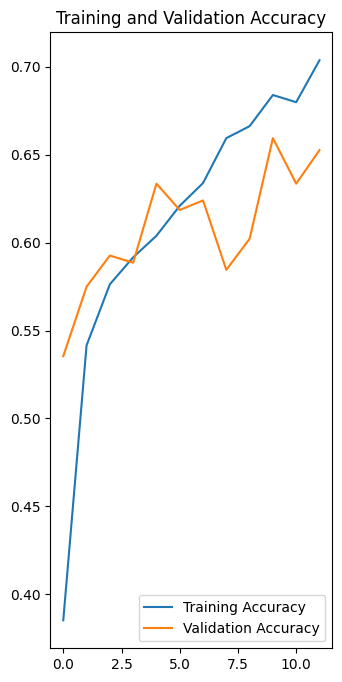

In [22]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')

plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')


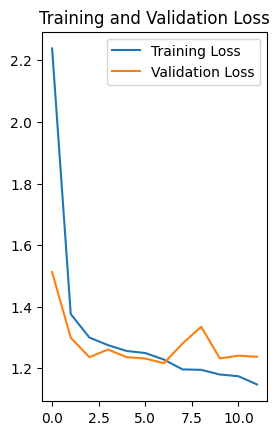

In [23]:
plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')

plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')

plt.title('Training and Validation Loss')

plt.show()


In [24]:
save_model(model, 'flower_model_trained.hdf5')

print("Model Saved")


<ipython-input-24-00d3b7dd8f35>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'flower_model_trained.hdf5')


Model Saved
